In [1]:
# Description: The program uses the recurrent artificial neural network called Long Short Term Memory (LSTM)
#              to predict the closing price of Apple corporation.

In [2]:
#Importing The Required Libraries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
from datetime import date
plt.style.use('fivethirtyeight')

In [3]:
#Upgrading Pandas and Pandas DataReader
!pip install --upgrade pandas
!pip install --upgrade pandas-datareader

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 78.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 kB 25.8 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==1.5.3, but you have pandas 2.1.0 which is incompatible.


In [4]:
#Load The Required Stock Data
startDate = pd.to_datetime('2012-01-01')
endDate = pd.to_datetime(date.today())
df = web.DataReader('AAPL', data_source = 'stooq', start = startDate, end = endDate)
df = df.reindex(index=df.index[::-1])
print(df)

                Open      High       Low     Close        Volume
Date                                                            
2012-01-03   12.4779   12.5577   12.4520   12.5198  3.544907e+08
2012-01-04   12.4849   12.6235   12.4600   12.5866  3.051786e+08
2012-01-05   12.6314   12.7422   12.5627   12.7272  3.178972e+08
2012-01-06   12.7800   12.8717   12.7630   12.8608  3.734286e+08
2012-01-09   12.9525   13.0213   12.8289   12.8408  4.620092e+08
...              ...       ...       ...       ...           ...
2023-09-07  175.1800  178.2100  173.5400  177.5600  1.124888e+08
2023-09-08  178.3500  180.2390  177.7900  178.1800  6.560207e+07
2023-09-11  180.0700  180.3000  177.3400  179.3600  5.895305e+07
2023-09-12  179.4900  180.1300  174.8200  176.3000  9.037019e+07
2023-09-13  176.5100  177.3000  173.9800  174.2100  8.426793e+07

[2943 rows x 5 columns]


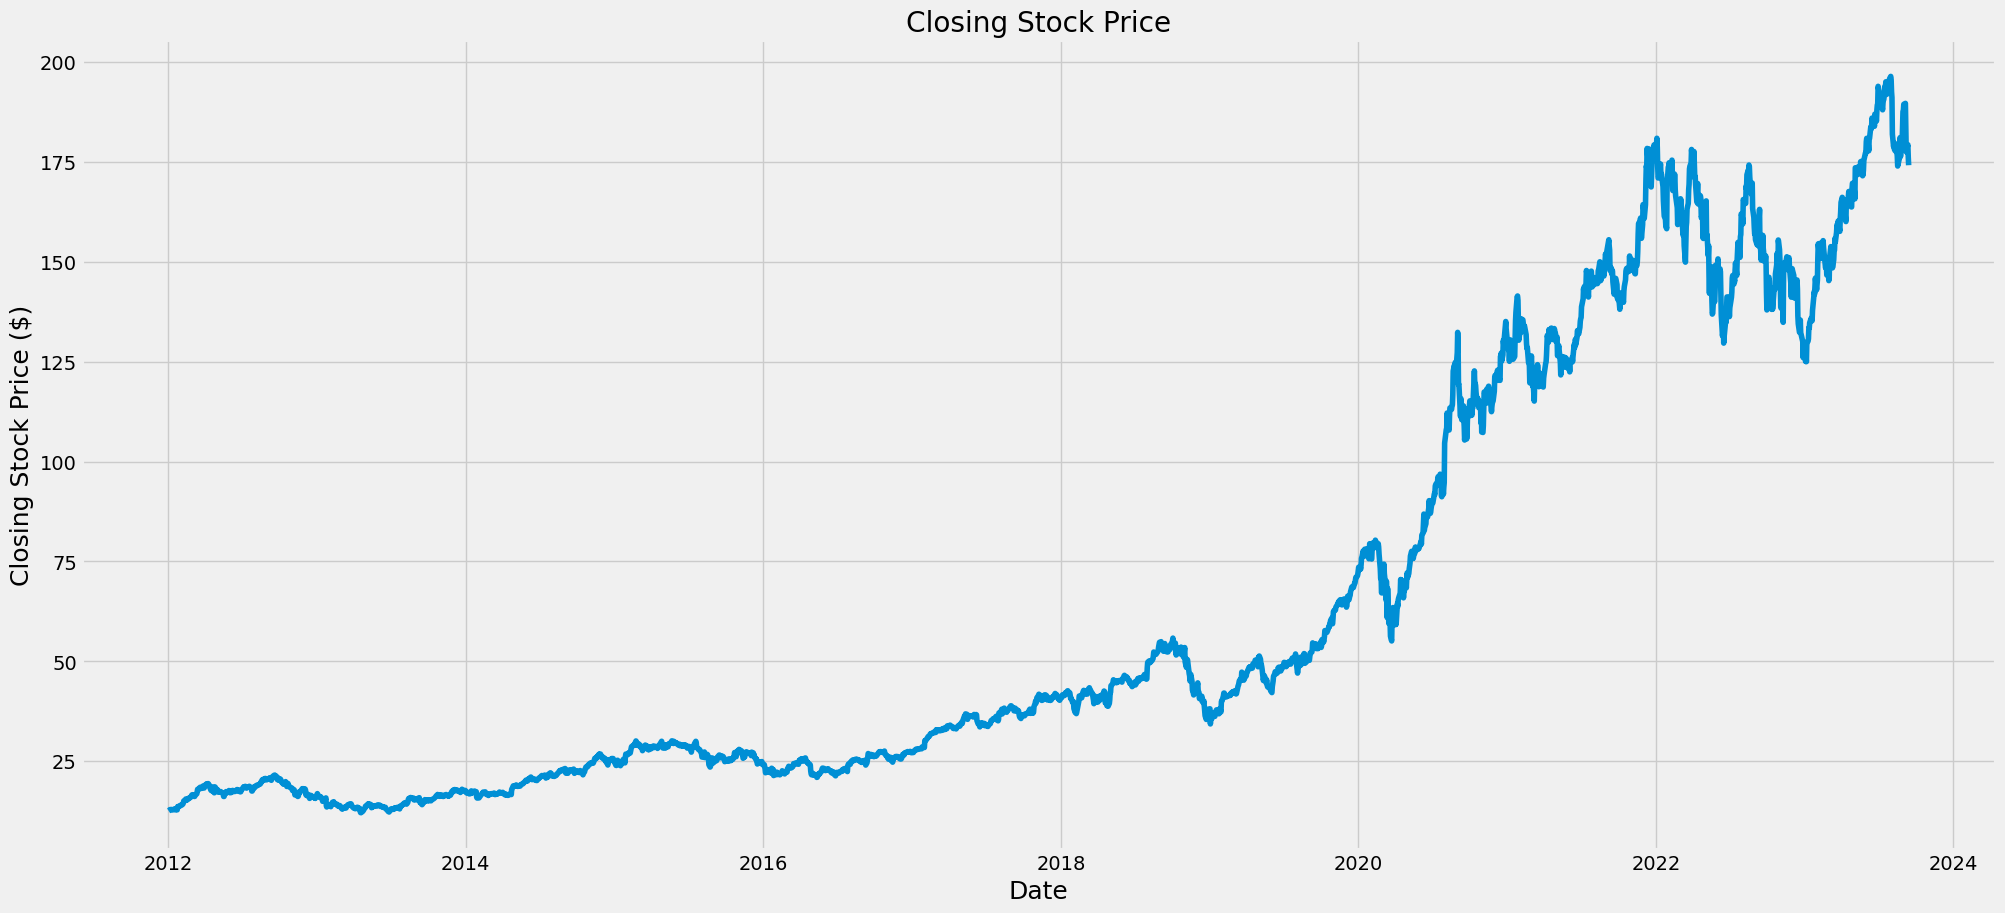

In [5]:
#Visualize the Closing Stock Price History
plt.figure(figsize=(22,10))
plt.title("Closing Stock Price")
plt.plot(df["Close"])
plt.xlabel("Date", fontsize = 18)
plt.ylabel("Closing Stock Price ($)", fontsize = 18)
plt.show()

In [6]:
#Create A New DataFrame with only Close column
data = df.filter(["Close"])
#Convert DataFrame To Numpy Array
dataset = data.values
# dataset = np.flip(dataset)
#Get The nUmber Of Rows To Train Teh Model On
training_data_len = math.ceil( len(dataset) * 0.8)

training_data_len

2355

In [7]:
#Scale The Data
scaler = MinMaxScaler(feature_range = (0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00247091],
       [0.00283319],
       [0.00359572],
       ...,
       [0.9073139 ],
       [0.89071827],
       [0.87938334]])

In [8]:
#Create The Scaled Trained DataSet
train_data = scaled_data[0:training_data_len, :]
x_train = []
y_train = []
for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i, 0])

In [9]:
#Convert The x_train and y_train to numpy array
x_train, y_train = np.array(x_train), np.array(y_train)
#Resize The Arrays
x_train = np.reshape(x_train, ( x_train.shape[0], x_train.shape[1], 1))

In [10]:
#Build The LSTM Model
model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences = False))
model.add(Dense(25))
model.add(Dense(1))

In [11]:
#Compile The Model
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
#Train The Model
model.fit(x_train, y_train, batch_size = 100, epochs = 64)

Epoch 1/64
23/23 [==============================] - 8s 149ms/step - loss: 0.0105
Epoch 2/64
23/23 [==============================] - 5s 198ms/step - loss: 5.7135e-04
Epoch 3/64
23/23 [==============================] - 5s 196ms/step - loss: 2.1350e-04
Epoch 4/64
23/23 [==============================] - 3s 151ms/step - loss: 1.8045e-04
Epoch 5/64
23/23 [==============================] - 4s 156ms/step - loss: 1.6377e-04
Epoch 6/64
23/23 [==============================] - 5s 205ms/step - loss: 1.5817e-04
Epoch 7/64
23/23 [==============================] - 5s 229ms/step - loss: 1.5134e-04
Epoch 8/64
23/23 [==============================] - 4s 169ms/step - loss: 1.5742e-04
Epoch 9/64
23/23 [==============================] - 2s 84ms/step - loss: 1.5222e-04
Epoch 10/64
23/23 [==============================] - 2s 79ms/step - loss: 1.5906e-04
Epoch 11/64
23/23 [==============================] - 2s 106ms/step - loss: 1.5941e-04
Epoch 12/64
23/23 [==============================] - 3s 129ms/step - 

In [12]:
#Create A Training DataSet
test_data = scaled_data[training_data_len - 60 : , : ]
x_test = []
y_test = dataset[training_data_len : , : ]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

In [13]:
#Convert The data into Numpy Array
x_test = np.array(x_test)
#Reshape The Data
x_test = np.reshape(x_test, ( x_test.shape[0], x_test.shape[1], 1))

In [14]:
#Get The Model Predictions
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
#Get The Root Mean Squared Error
rmse = np.sqrt(np.mean(((predictions- y_test)**2)))
print("Error % = ", rmse) #Should Be Closer To Zero
print("Accuracy % = ", (100-rmse)) #Should Be Closer To 100

19/19 [==============================] - 1s 15ms/step
Error % =  4.308639399986939
Accuracy % =  95.69136060001306


<ipython-input-15-e737ba5bb5bc>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


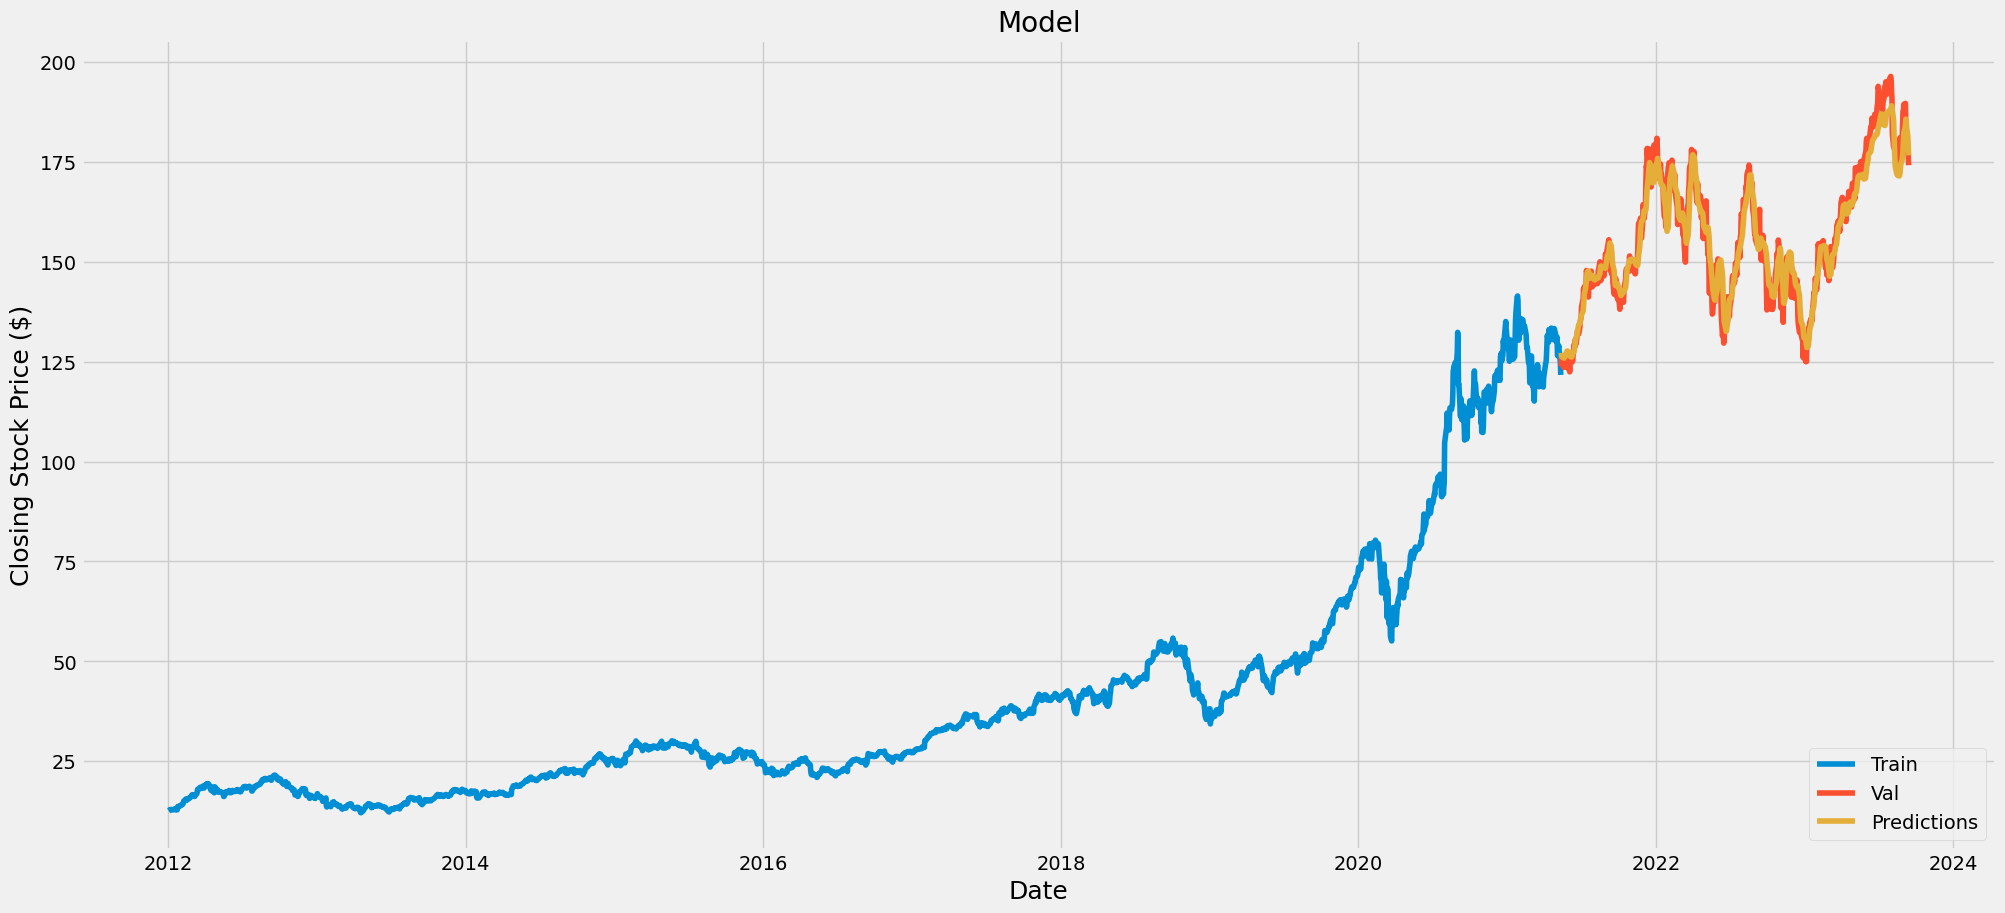

In [15]:
#Plot The Data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Visuavilize The Data
plt.figure(figsize=(22,10))
plt.title("Model")
plt.xlabel("Date", fontsize = 18)
plt.ylabel("Closing Stock Price ($)", fontsize = 18)
plt.plot(train["Close"])
plt.plot(valid[["Close", "Predictions"]])
plt.legend(["Train", "Val", "Predictions"], loc = "lower right")
plt.show()

In [16]:
#Comparing Actual and Predicted Values
valid

,Close,Predictions
Date,,
2021-05-13,123.882,127.227180
2021-05-14,126.334,126.349579
2021-05-17,125.178,126.110847
2021-05-18,123.763,126.076477
2021-05-19,123.603,125.988129
...,...,...
2023-09-07,177.560,185.634537
2023-09-08,178.180,183.750076
2023-09-11,179.360,181.326477


In [17]:
#Get The Quote
apple_quote = web.DataReader('AAPL', data_source = 'stooq', start = startDate, end = endDate)
#Create a new dataframe
new_df = apple_quote.filter(["Close"])
#Get The last 60 days price and convert the dataframe into an array
last_60_days = new_df[:60].values
#Scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
#Create an empty list
X_test = []
#Append the past 60 days
X_test.append(last_60_days_scaled)
#Convert the X_test dataset to numpy array
X_test = np.array(X_test)
#Reshape the test
X_test = np.reshape(X_test, ( X_test.shape[0], X_test.shape[1], 1 ))
#Get the predicted price
pred_price = model.predict(X_test)
#Undo the Scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

1/1 [==============================] - 0s 31ms/step
[[180.521]]


In [18]:
apple_quote['Close'][0]

174.21